In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/train-features/boruta_data/boruta_test_summ.csv
/kaggle/input/train-features/boruta_data/boruta_val_summ.csv
/kaggle/input/train-features/boruta_data/boruta_train_summ.csv


In [2]:
# for making a shell able to execute python
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_iteractivity = "all"

import pandas as pd
import numpy as np

In [95]:
# Loading boruta selected features for training the classification model

train_df = pd.read_csv("/kaggle/input/train-features/boruta_data/boruta_train_summ.csv")
val_df = pd.read_csv("/kaggle/input/train-features/boruta_data/boruta_val_summ.csv")
test_df = pd.read_csv("/kaggle/input/train-features/boruta_data/boruta_test_summ.csv")

In [4]:
# Sklearn provides selection of tools for machine learning and stats modelling
# For classification, regression, clusering, dimensionality reduction

import sklearn
sklearn.__version__

'0.24.1'

In [96]:
train_df.head()

,id,label,X.HR.__approximate_entropy__m_2__r_0.5,X.HR.__approximate_entropy__m_2__r_0.9,X.HR.__change_quantiles__f_agg_.var.__isabs_True__qh_0.8__ql_0.6,X.HR.__cwt_coefficients__widths_.2..5..10..20.__coeff_0__w_2,X.HR.__energy_ratio_by_chunks__num_segments_10__segment_focus_3,X.HR.__energy_ratio_by_chunks__num_segments_10__segment_focus_4,X.HR.__energy_ratio_by_chunks__num_segments_10__segment_focus_7,X.HR.__fft_coefficient__coeff_10__attr_.abs.,...,final_abp_sys__standard_deviation,final_abp_sys__sum_of_reoccurring_data_points,final_abp_sys__sum_of_reoccurring_values,final_abp_sys__sum_values,final_abp_sys__time_reversal_asymmetry_statistic__lag_1,final_abp_sys__time_reversal_asymmetry_statistic__lag_2,final_abp_sys__time_reversal_asymmetry_statistic__lag_3,final_abp_sys__variance,GENDER,age
0,p000052_261857_1_54_1591,1,0.618257,1.044650,-0.737736,-0.097681,0.364471,-0.454931,0.252518,-0.705528,...,-1.032898,-0.308462,-0.875743,0.030331,-0.167471,-0.226271,-0.222942,-0.509582,M,-0.697431
1,p000138_275067_1_22_631,0,-0.148506,-0.342751,0.080624,-6.734420,0.018978,-0.514977,1.503207,1.118543,...,0.800748,-0.892388,1.855497,0.079512,0.699096,0.959605,0.971670,0.342319,M,-0.503556
2,p000138_275067_1_22_631,0,-0.148506,-0.342751,0.080624,-6.734420,0.018978,-0.514977,1.503207,1.118543,...,0.800748,-0.892388,1.855497,0.079512,0.699096,0.959605,0.971670,0.342319,M,-0.503556
3,p000222_260665_1_48_1411,1,1.096153,-0.096509,-0.507551,-0.236171,-0.016998,0.616561,-0.496964,-0.878014,...,-1.134580,0.931446,-0.805948,1.022362,-0.080426,-0.109288,-0.102547,-0.522869,F,-0.094353
4,p000357_235292_1_289_8641,0,-0.762110,-0.609662,-0.524244,-0.008936,1.306357,-0.282198,-0.056869,-0.752127,...,-0.838502,0.545574,-0.825995,-0.353084,-0.505237,-0.651549,-0.633149,-0.474249,M,-0.175657


In [97]:
print("Shape of training set: ", train_df.shape)
print("Shape of validation set: ", val_df.shape)
print("Shape of test set: ", test_df.shape)

Shape of training set:  (1332, 446)
Shape of validation set:  (392, 446)
Shape of test set:  (392, 446)


This indicates 1332 patients in train set, 392 patients in validation set and 392 patients in test set. Each segment having 1 patient ID, label variable and 444 features

In [98]:
# Extracting only the features
X = train_df[train_df.columns.difference(['id', 'label', 'age', 'GENDER'])]

# Extracting the target variable
Y = train_df[['label']]

X_train = X
y_train = np.array(Y)

## Basic Random Forest model for AHE prediction

In [99]:
from sklearn.ensemble import RandomForestClassifier

model_ahe = RandomForestClassifier(n_estimators=1750)
# n_estimators is the number of trees
# default value of n_estimators is 10

In [100]:
model_ahe.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(n_estimators=1750)

In [101]:
# preparing the test set in the same way
X_test = test_df[test_df.columns.difference(['id', 'label', 'age', 'GENDER'])]
y_test = np.array(test_df[['label']])

In [103]:
y_probability = model_ahe.predict_proba(X_test)
y_predicted = (y_probability[:,1]>=0.59).astype('int') 
# taking the second element in predicted probability and setting threshold to 0.59

In [57]:
#y_probability
#y_predicted

In [105]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score

In [106]:
def evaluating_model(y_test, y_probability, y_predicted):
    # AUROC
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_probability[:,1])
    auc_score = metrics.auc(fpr, tpr)
    auc_score  # this is exactly the same as calculating through metrics.roc_auc_score directly

    # AUPRC
    precision, recall, threshold = metrics.precision_recall_curve(y_test, y_probability[:,1])
    auprc_score = metrics.auc(recall, precision)
    auprc_score


    print("Prediction Summary")
    print("--------------------------------------")

    print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted)))
    print("Precision score: {:.2f}".format(precision_score(y_test, y_predicted)))
    print("Recall score: {:.2f}".format(recall_score(y_test, y_predicted)))
    print("F1 score: {:.2f}".format(f1_score(y_test, y_predicted)))
    print("\n")
    print("AUROC score: {:.2f}".format(roc_auc_score(y_test, y_probability[:,1])))
    print("AUPRC score: {:.2f}".format(auprc_score))
    
evaluating_model(y_test, y_probability, y_predicted)

Prediction Summary
--------------------------------------
Accuracy: 0.70
Precision score: 0.70
Recall score: 0.71
F1 score: 0.71


AUROC score: 0.78
AUPRC score: 0.76


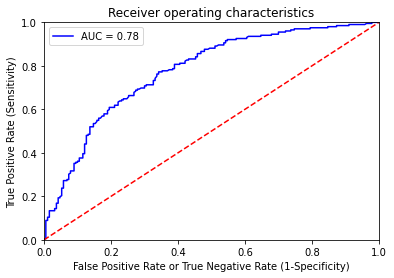

In [60]:
import matplotlib.pyplot as plt
plt.title("Receiver operating characteristics")
plt.xlabel("False Positive Rate or True Negative Rate (1-Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score) # blue auc curve line
plt.legend()
plt.plot([0,1], [0,1], 'r--') # red dashed diagnol line
plt.show()

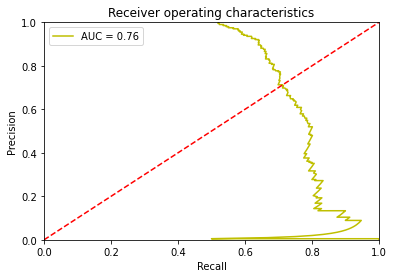

In [77]:
import matplotlib.pyplot as plt
plt.title("Receiver operating characteristics")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(precision, recall, 'y', label = 'AUPRC = %0.2f'%auprc_score) # yellow auprc curve line
plt.legend()
plt.plot([0,1], [0,1], 'r--') # red dashed diagnol line
plt.show()

#### Model has decent precision, recall, f1 score and accuracy. It has good AUROC and AUPRC

In [39]:
import pickle
filename = "basic_ahe_rf.sav"
pickle.dump

## Basic Random Forest for LOS prediction

In [140]:
train_df = pd.read_csv("../input/train-features-1/boruta_data_los/boruta_train_summ.csv")
val_df = pd.read_csv("../input/train-features-1/boruta_data_los/boruta_val_summ.csv")
test_df = pd.read_csv("../input/train-features-1/boruta_data_los/boruta_test_summ.csv")

In [108]:
train_df.head()

,id,LOS_disc,X.HR.__abs_energy,X.HR.__absolute_sum_of_changes,X.HR.__agg_autocorrelation__f_agg_.mean.__maxlag_40,X.HR.__agg_autocorrelation__f_agg_.median.__maxlag_40,X.HR.__agg_autocorrelation__f_agg_.var.__maxlag_40,X.HR.__agg_linear_trend__f_agg_.max.__chunk_len_10__attr_.intercept.,X.HR.__agg_linear_trend__f_agg_.max.__chunk_len_10__attr_.rvalue.,X.HR.__agg_linear_trend__f_agg_.max.__chunk_len_10__attr_.slope.,...,final_abp_sys__standard_deviation,final_abp_sys__sum_of_reoccurring_data_points,final_abp_sys__sum_of_reoccurring_values,final_abp_sys__sum_values,final_abp_sys__time_reversal_asymmetry_statistic__lag_1,final_abp_sys__time_reversal_asymmetry_statistic__lag_2,final_abp_sys__time_reversal_asymmetry_statistic__lag_3,final_abp_sys__variance,GENDER,age
0,p000107_252542,0,-0.863084,-0.666340,1.507252,1.467062,-1.026279,-1.250568,0.962632,0.872868,...,-0.769837,0.108120,-0.499646,-0.14257,-1.259840,-1.172745,-1.115637,-0.610068,1,0.216704
1,p000177_288571,1,-1.143335,-0.763745,-0.582259,-0.576513,2.709384,-1.276166,0.222403,0.168484,...,0.835252,0.925568,2.846669,1.93629,3.036344,3.071203,3.071963,0.514357,1,0.728071
2,p000177_288571,1,-1.143335,-0.763745,-0.582259,-0.576513,2.709384,-1.276166,0.222403,0.168484,...,0.835252,0.925568,2.846669,1.93629,3.036344,3.071203,3.071963,0.514357,1,0.728071
3,p000177_288571,1,-1.143335,-0.763745,-0.582259,-0.576513,2.709384,-1.276166,0.222403,0.168484,...,0.835252,0.925568,2.846669,1.93629,3.036344,3.071203,3.071963,0.514357,1,0.728071
4,p000177_288571,1,-1.143335,-0.763745,-0.582259,-0.576513,2.709384,-1.276166,0.222403,0.168484,...,0.835252,0.925568,2.846669,1.93629,3.036344,3.071203,3.071963,0.514357,1,0.728071


In [141]:
# concatenating train and val
final_train_df = pd.concat((train_df, val_df), axis=0)

In [142]:
X = final_train_df[final_train_df.columns.difference(['id', 'LOS_disc', 'age', 'GENDER'])]
Y = final_train_df[['LOS_disc']]

X_train = X
y_train = np.array(Y)

In [143]:
from sklearn.ensemble import RandomForestClassifier
model_los = RandomForestClassifier(n_estimators = 1250)
model_los

RandomForestClassifier(n_estimators=1250)

In [144]:
model_los.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(n_estimators=1250)

In [145]:
# Preparing the test set
X = test_df[test_df.columns.difference(['id', 'LOS_disc', 'age', 'GENDER'])]
Y = test_df[['LOS_disc']]

X_test = X
y_test = np.array(Y)

In [146]:
y_probability = model_los.predict_proba(X_test)
#y_probability
# using threshold 0.3376 to get low false negatives
y_predicted = (y_probability[:,1]>0.3376).astype('int')

In [147]:
# calling function
evaluating_model(y_test, y_probability, y_predicted)

Prediction Summary
--------------------------------------
Accuracy: 0.75
Precision score: 0.51
Recall score: 0.65
F1 score: 0.57


AUROC score: 0.77
AUPRC score: 0.52


In [117]:
# AUROC
fpr, tpr, threshold = metrics.roc_curve(y_test, y_probability[:,1])
auc_score = metrics.auc(fpr, tpr)
#auc_score  # this is exactly the same as calculating through metrics.roc_auc_score directly

# AUPRC
precision, recall, threshold = metrics.precision_recall_curve(y_test, y_probability[:,1])
auprc_score = metrics.auc(recall, precision)

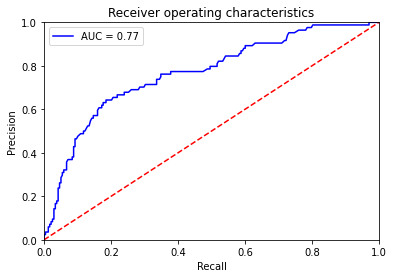

In [120]:
import matplotlib.pyplot as plt
plt.title("Receiver operating characteristics")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score) # blue auc curve line
plt.legend()
plt.plot([0,1], [0,1], 'r--') # red dashed diagnol line
plt.show()

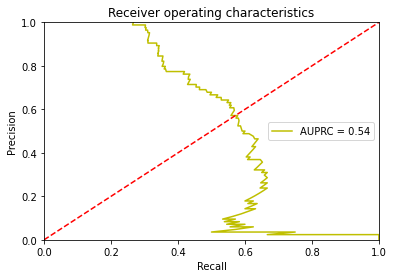

In [119]:
import matplotlib.pyplot as plt
plt.title("Receiver operating characteristics")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(precision, recall, 'y', label = 'AUPRC = %0.2f'%auprc_score) # yellow auprc curve line
plt.legend()
plt.plot([0,1], [0,1], 'r--') # red dashed diagnol line
plt.show()

#### Model shows decent accuracy and also AUC score, however, precision, recall, f1_score and AUPRC are not so good

In [123]:
filename = "basic_los_rf.sav"
pickle.dump(model_los, open(filename, 'wb'))

## Basic Random Forest for Shock prediction

In [124]:
train_df = pd.read_csv("../input/train-features-2/Boruta_data_shock/boruta_train_summ.csv")
val_df = pd.read_csv("../input/train-features-2/Boruta_data_shock/boruta_val_summ.csv")
test_df = pd.read_csv("../input/train-features-2/Boruta_data_shock/boruta_test_summ.csv")

In [125]:
train_df.head()

,id,label,X.HR.__abs_energy,X.HR.__agg_linear_trend__f_agg_.max.__chunk_len_10__attr_.intercept.,X.HR.__agg_linear_trend__f_agg_.max.__chunk_len_10__attr_.rvalue.,X.HR.__agg_linear_trend__f_agg_.max.__chunk_len_10__attr_.slope.,X.HR.__agg_linear_trend__f_agg_.max.__chunk_len_50__attr_.intercept.,X.HR.__agg_linear_trend__f_agg_.max.__chunk_len_50__attr_.rvalue.,X.HR.__agg_linear_trend__f_agg_.max.__chunk_len_50__attr_.slope.,X.HR.__agg_linear_trend__f_agg_.max.__chunk_len_5__attr_.intercept.,...,final_abp_sys__quantile__q_0.2,final_abp_sys__quantile__q_0.3,final_abp_sys__quantile__q_0.4,final_abp_sys__quantile__q_0.6,final_abp_sys__quantile__q_0.7,final_abp_sys__quantile__q_0.8,final_abp_sys__quantile__q_0.9,final_abp_sys__sum_values,GENDER,age
0,p000107_252542_1_37_1081,1,-573284.93550,-21.715603,0.827494,0.449115,-23.961665,1.048891,2.805960,-20.795600,...,2.540665,-0.197714,-1.651373,-2.491844,-3.050218,-5.415606,-6.095397,-373.584377,1,3.283013
1,p000208_279205_1_319_9541,0,-83824.23258,-5.372679,0.448493,0.629486,4.814526,0.572221,1.468817,-6.903406,...,25.395670,25.473846,27.774066,34.586176,38.984580,44.813281,50.222072,8708.573101,1,-16.338905
2,p000214_255525_1_39_1141,1,486377.74450,10.559611,0.293794,0.108021,8.109764,0.331317,0.997388,11.534444,...,-24.645330,-23.483709,-22.499651,-20.013824,-17.109048,-13.886719,-12.727928,-5204.024801,1,-2.892329
3,p000222_260665_1_91_2701,1,-459539.93550,-12.779705,-0.214743,-0.068834,-17.128332,0.099391,0.505960,-11.571724,...,-9.829573,-12.005668,-14.021610,-13.737515,-15.982739,-17.223560,-20.714769,-3620.209447,0,2.532328
4,p000262_243312_1_40_1171,1,395275.81450,7.160466,0.788988,0.309798,4.252621,1.129976,2.220245,7.792209,...,18.449769,16.108508,15.779417,14.685401,13.818288,11.452900,8.523974,3707.274392,1,-2.662192


In [126]:
# Shape
print("Shape of training set: ", train_df.shape)
print("Shape of validation set: ", val_df.shape)
print("Shape of test set: ", test_df.shape)

Shape of training set:  (1516, 558)
Shape of validation set:  (415, 558)
Shape of test set:  (415, 558)


Number of patients in training set are 1516 and test and val set are 415 each. Number of features in each set are 558

In [127]:
# Preparing training set
train_val_df = pd.concat((train_df, val_df), axis=0)
X = train_val_df[train_val_df.columns.difference(['id', 'label', 'age', 'GENDER'])]
Y = train_val_df[['label']]

X_train = X
y_train = np.array(Y)

In [128]:
# Preparing test set
X = test_df[test_df.columns.difference(['id', 'label', 'age', 'GENDER'])]
Y = test_df[['label']]

X_test = X
y_test = np.array(Y)

In [130]:
# model
from sklearn.ensemble import RandomForestClassifier
model_shock = RandomForestClassifier(n_estimators=1250)

In [131]:
model_shock.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(n_estimators=1250)

In [132]:
# predicting
y_probability = model_shock.predict_proba(X_test)
y_predicted = (y_probability[:,1]>0.61).astype('int')

In [134]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[126,  38],
       [ 69, 182]])

In [133]:
evaluating_model(y_test, y_probability, y_predicted)

Prediction Summary
--------------------------------------
Accuracy: 0.74
Precision score: 0.83
Recall score: 0.73
F1 score: 0.77


AUROC score: 0.84
AUPRC score: 0.90


### Good scores!

In [135]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_probability[:,1])
auc_score = metrics.auc(fpr, tpr)

precision, recall, threshold = metrics.precision_recall_curve(y_test, y_probability[:,1])
auprc_score = metrics.auc(recall, precision)

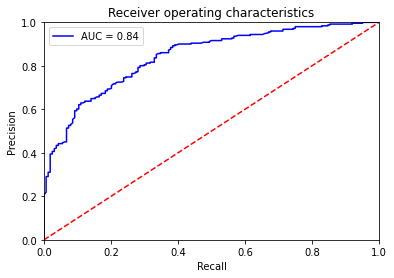

In [137]:
import matplotlib.pyplot as plt
plt.title("Receiver operating characteristics")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score) # blue auroc curve line
plt.legend()
plt.plot([0,1], [0,1], 'r--') # red dashed diagnol line
plt.show()

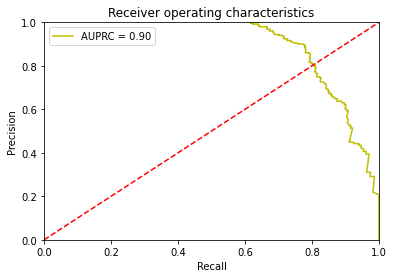

In [138]:
import matplotlib.pyplot as plt
plt.title("Receiver operating characteristics")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(precision, recall, 'y', label = 'AUPRC = %0.2f'%auprc_score) # yellow auprc curve line
plt.legend()
plt.plot([0,1], [0,1], 'r--') # red dashed diagnol line
plt.show()

In [139]:
filename = "basic_shock_rf.sav"
pickle.dump(model_shock, open(filename, 'wb'))

## Predicting on processed features from the dataset uploaded by user in real time

In [148]:
processed_uploaded_df = pd.read_csv("../input/uploaded-data/Processed_Dataset.csv")

In [149]:
boruta_ahe_features = pd.read_csv("../input/train-features/boruta_data/boruta_train_summ.csv")

In [151]:
boruta_features_list = boruta_ahe_features[boruta_ahe_features.columns.difference(['id', 'label', 'age', 'GENDER'])].columns

In [152]:
boruta_features_list

Index(['X.HR.__approximate_entropy__m_2__r_0.5',
       'X.HR.__approximate_entropy__m_2__r_0.9',
       'X.HR.__change_quantiles__f_agg_.var.__isabs_True__qh_0.8__ql_0.6',
       'X.HR.__cwt_coefficients__widths_.2..5..10..20.__coeff_0__w_2',
       'X.HR.__energy_ratio_by_chunks__num_segments_10__segment_focus_3',
       'X.HR.__energy_ratio_by_chunks__num_segments_10__segment_focus_4',
       'X.HR.__energy_ratio_by_chunks__num_segments_10__segment_focus_7',
       'X.HR.__fft_coefficient__coeff_10__attr_.abs.',
       'X.HR.__fft_coefficient__coeff_12__attr_.abs.',
       'X.HR.__fft_coefficient__coeff_13__attr_.abs.',
       ...
       'final_abp_sys__spkt_welch_density__coeff_5',
       'final_abp_sys__spkt_welch_density__coeff_8',
       'final_abp_sys__standard_deviation',
       'final_abp_sys__sum_of_reoccurring_data_points',
       'final_abp_sys__sum_of_reoccurring_values', 'final_abp_sys__sum_values',
       'final_abp_sys__time_reversal_asymmetry_statistic__lag_1',
      

These boruta features are the ones that we want to extract from the uploaded dataset which has been processed so that our pre-trained model can make the prediction

In [157]:
selected_df = processed_uploaded_df[list(set(processed_uploaded_df.columns) & set(boruta_features_list))]

# removing duplicates
#print("Duplicate columns in the processed uploaded data: ", selected_df.columns.duplicated)
selected_df = selected_df.loc[:, ~selected_df.columns.duplicated()]

# ordering according to the boruta features
selected_df = selected_df[boruta_features_list]

In [158]:
selected_df.shape

(3, 442)

In [159]:
selected_df.head()

,X.HR.__approximate_entropy__m_2__r_0.5,X.HR.__approximate_entropy__m_2__r_0.9,X.HR.__change_quantiles__f_agg_.var.__isabs_True__qh_0.8__ql_0.6,X.HR.__cwt_coefficients__widths_.2..5..10..20.__coeff_0__w_2,X.HR.__energy_ratio_by_chunks__num_segments_10__segment_focus_3,X.HR.__energy_ratio_by_chunks__num_segments_10__segment_focus_4,X.HR.__energy_ratio_by_chunks__num_segments_10__segment_focus_7,X.HR.__fft_coefficient__coeff_10__attr_.abs.,X.HR.__fft_coefficient__coeff_12__attr_.abs.,X.HR.__fft_coefficient__coeff_13__attr_.abs.,...,final_abp_sys__spkt_welch_density__coeff_5,final_abp_sys__spkt_welch_density__coeff_8,final_abp_sys__standard_deviation,final_abp_sys__sum_of_reoccurring_data_points,final_abp_sys__sum_of_reoccurring_values,final_abp_sys__sum_values,final_abp_sys__time_reversal_asymmetry_statistic__lag_1,final_abp_sys__time_reversal_asymmetry_statistic__lag_2,final_abp_sys__time_reversal_asymmetry_statistic__lag_3,final_abp_sys__variance
0,0.152161,0.120190,0.000000,0.001584,0.000661,-0.000520,-0.000835,12.051996,12.361479,10.323557,...,412.169757,7.293468,9.308917,20631.5,8363.3,3260.558346,-7843.770264,-17177.159628,-23855.573627,86.655931
1,0.439576,0.237695,0.041814,1.041557,0.009248,0.005570,-0.009793,47.703426,34.214349,43.984010,...,176.922081,1.906198,5.029854,18517.4,6318.2,-6627.606767,-1773.385427,-4118.164211,-5474.760531,25.299426
2,0.085902,0.040298,1.082152,-0.077716,-0.013864,-0.008681,0.021815,152.903044,87.418429,49.099337,...,731.611749,1294.858212,6.704024,18913.1,7589.5,-3512.369333,2801.991657,6688.589984,9305.594593,44.943941


In [160]:
model_ahe = pickle.load(open('./basic_ahe_rf.sav', 'rb'))

In [165]:
y_probability = model_ahe.predict_proba(selected_df)
y_predicted = (y_probability[:,1]>=0.5).astype('int')
y_predicted

array([0, 1, 1])

### Thus in the uploaded dataset, 1st patient is predicted to be normal however the other 2 are predicted to develop Acute Hypertension episodes abnormalities